<a href="https://colab.research.google.com/github/LuciaBossio/Data-Science-II-Entrega-Garc-a-Bossio/blob/main/proyectodsiipartei_garcia_bossio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Entrega I García Bossio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ventas_tienda Bossio V3.csv to Ventas_tienda Bossio V3.csv


In [ ]:
import pandas as pd
df=pd.read_csv('Ventas_tienda Bossio V3.csv', sep=';', encoding='latin-1')
df.head()
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#print=df

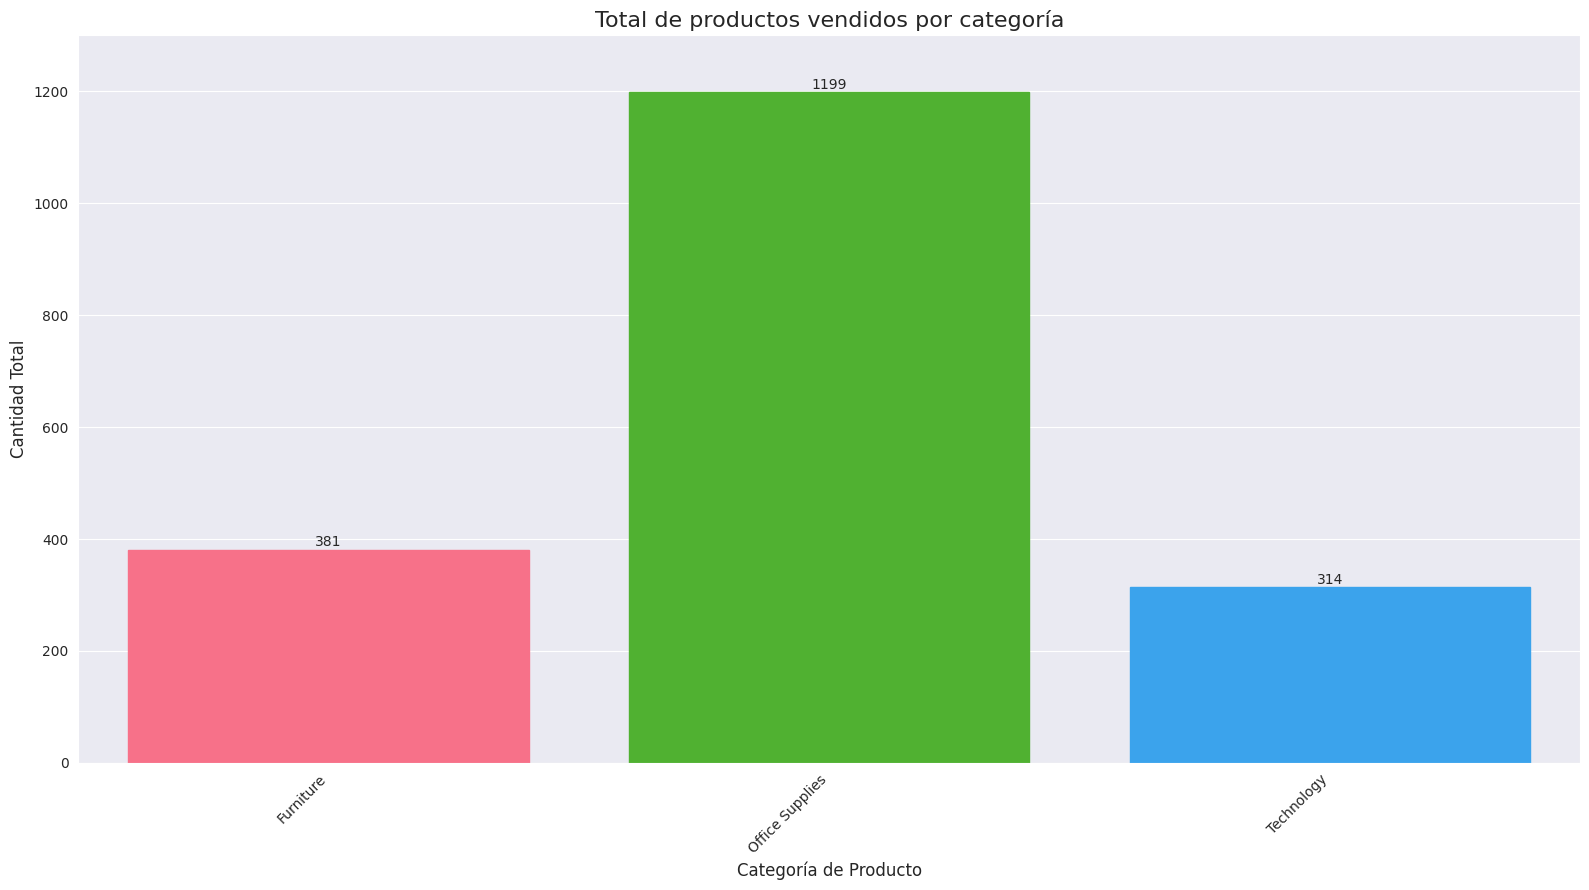

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_agrupado = df_ventas.groupby('categoria_producto')['cantidad'].sum().reset_index()


plt.figure(figsize=(16, 9))
sns.set_style("darkgrid")

ax = sns.barplot(x='categoria_producto', y='cantidad', data=df_agrupado, errorbar=None)


colors = sns.color_palette("husl", len(ax.patches))
for patch, color in zip(ax.patches, colors):
    patch.set_color(color)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{int(height)}',
            ha='center', va='bottom', fontsize=10)


ax.set_ylim(0, 1300)


plt.title('Total de productos vendidos por categoría', fontsize=16)
plt.xlabel('Categoría de Producto', fontsize=12)
plt.ylabel('Cantidad Total', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()



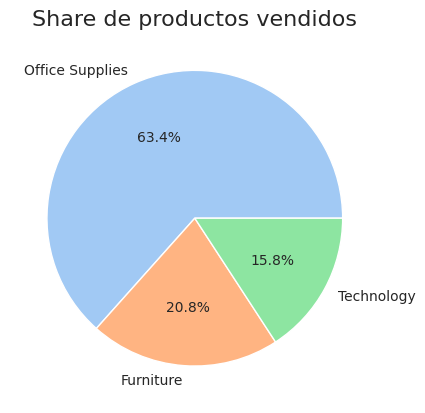

In [ ]:
data = df['categoria_producto'].value_counts()
labels=data.index
colors = sns.color_palette("pastel")
plt.pie(data, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Share de productos vendidos', fontsize=16)
plt.show()

In [ ]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], format='%d/%m/%Y', dayfirst=True)

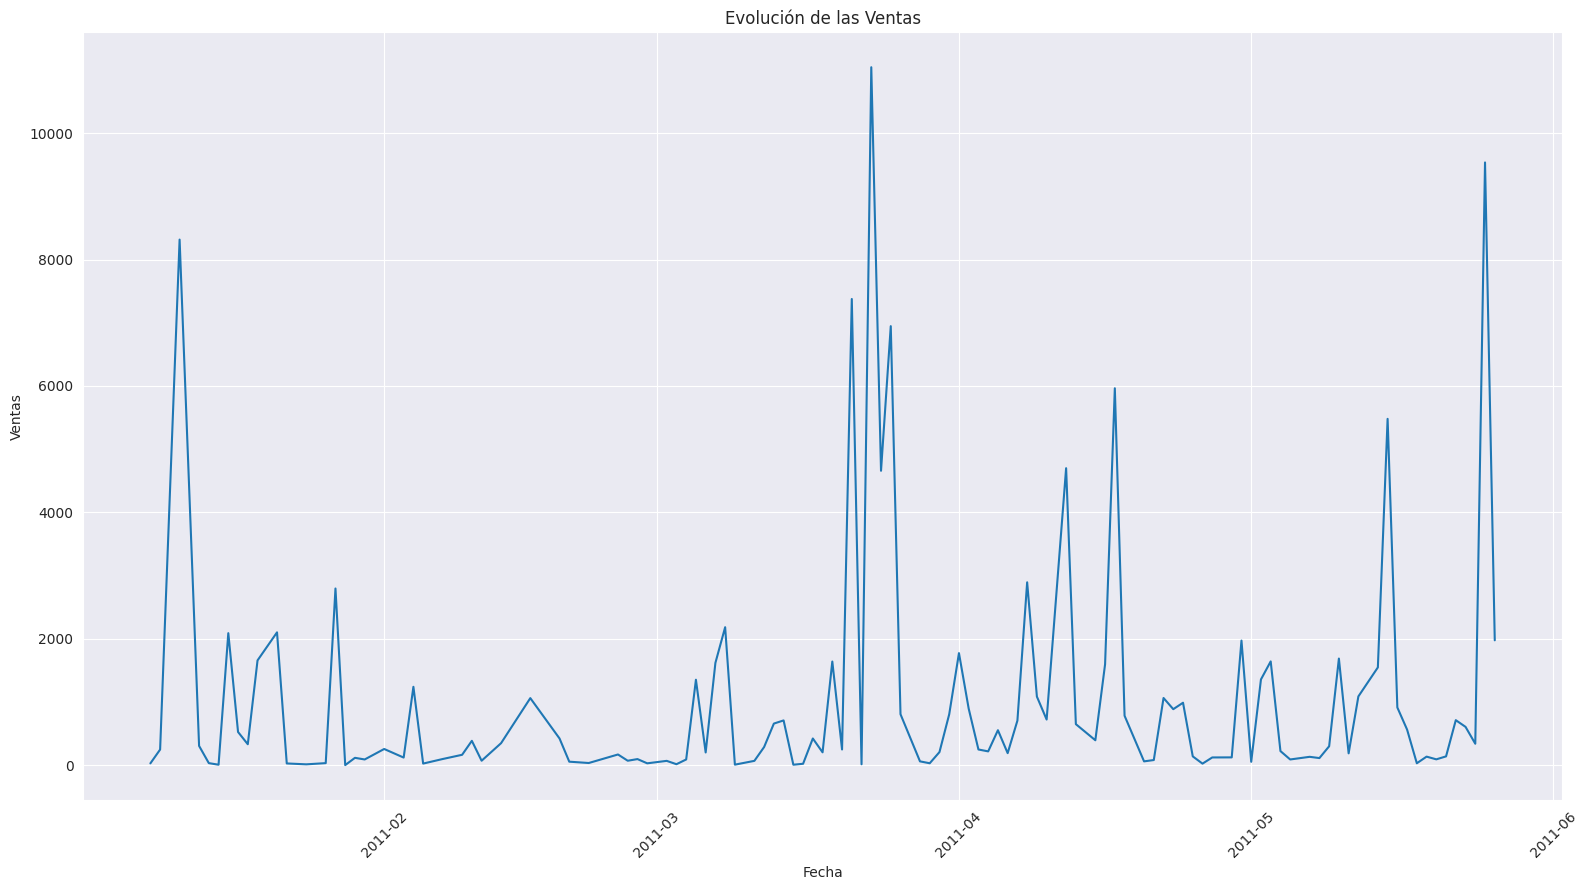

In [ ]:
sales_over_time = df.groupby('fecha_venta')['total_venta'].sum()

plt.figure(figsize=(16, 9))
sns.lineplot(x=sales_over_time.index, y=sales_over_time.values)
plt.title('Evolución de las Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Método de feature selection para reducir la dimensionalidad del dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ventas_tienda Bossio V3.csv to Ventas_tienda Bossio V3 (1).csv


In [ ]:
import pandas as pd
data = pd.read_csv('Ventas_tienda Bossio V3 (1).csv', encoding='latin-1', sep=';')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import io

In [ ]:
for col in data.select_dtypes(include=np.number).columns:
    data[col] = data[col].fillna(data[col].mean())

In [ ]:
categorical_cols = ['nombre_producto', 'categoria_producto', 'nombre_cliente','id_producto','id_cliente']
for col in categorical_cols:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes

In [ ]:
data['fecha_venta'] = pd.to_datetime(data['fecha_venta'], format='%d/%m/%Y').astype(int) // 10**9

In [ ]:
X = data.drop('total_venta', axis=1, errors='ignore')
y = data['total_venta'] if 'total_venta' in data.columns else None

if y is None:
    print("Error: La columna 'total_venta' no se encuentra en el dataset.")
    exit()

print("Forma de X después de la división:", X.shape)
print("Forma de y después de la división:", y.shape)

Forma de X después de la división: (500, 9)
Forma de y después de la división: (500,)


In [ ]:
print("Forma de X después de limpiar NaN:", X.shape)
print("Forma de y después de limpiar NaN:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)

Forma de X después de limpiar NaN: (500, 9)
Forma de y después de limpiar NaN: (500,)
Forma de X_train: (350, 9)
Forma de X_test: (150, 9)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
importances = model.feature_importances_

In [ ]:
feature_importances = pd.Series(importances, index=X.columns)
print("Importancia de las características:")
print(feature_importances.sort_values(ascending=False))

Importancia de las características:
precio_unitario       0.923378
cantidad              0.034362
nombre_producto       0.011454
nombre_cliente        0.009426
id_venta              0.008124
fecha_venta           0.004932
id_producto           0.003749
id_cliente            0.003599
categoria_producto    0.000976
dtype: float64


**Algoritmo de regresión o clasificación para entrenar con los datos elegidos**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import io

In [ ]:
data = pd.read_csv('ventas_tienda Bossio V2 (1).csv', encoding='latin-1', sep=';')

In [ ]:
for col in data.select_dtypes(include=np.number).columns:
    data[col] = data[col].fillna(data[col].mean())

In [ ]:
categorical_cols = ['nombre_producto', 'categoria_producto', 'nombre_cliente','id_producto','id_cliente']
for col in categorical_cols:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes

In [ ]:
data['fecha_venta'] = pd.to_datetime(data['fecha_venta'], format='%d/%m/%Y').astype(int) // 10**9

In [ ]:
X = data.drop('total_venta', axis=1, errors='ignore')
y = data['total_venta'] if 'total_venta' in data.columns else None

if y is None:
    print("Error: La columna 'total_venta' no se encuentra en el dataset.")
    exit()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 75786.629044
MAE: 53.72453333333333
R2: 0.8849787956189801


In [ ]:
# Redefine the built-in print function
import builtins
print = builtins.print

**Unificar BDD**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ventas_tienda Bossio V3-BASE 2.csv to Ventas_tienda Bossio V3-BASE 2.csv


In [ ]:
import pandas as pd
df=pd.read_csv('Ventas_tienda Bossio V3-BASE 2.csv', sep=';', encoding='latin-1')

In [ ]:
import pandas as pd
df_ventas = pd.read_csv('Ventas_tienda Bossio V3.csv', encoding='latin-1', sep=';')
df_base = pd.read_csv('Ventas_tienda Bossio V3-BASE 2.csv', encoding='latin-1', sep=';')
df_fusionado = pd.merge(df_ventas, df_base, on='id_cliente', how='inner')  # Solo filas en común
df_fusionado.to_csv('Ventas_fusionado.csv', index=False, sep=';')

/tmp/ipython-input-1617394298.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="tipo_cliente", y="total_venta", data=df_fusionado, ci=None)


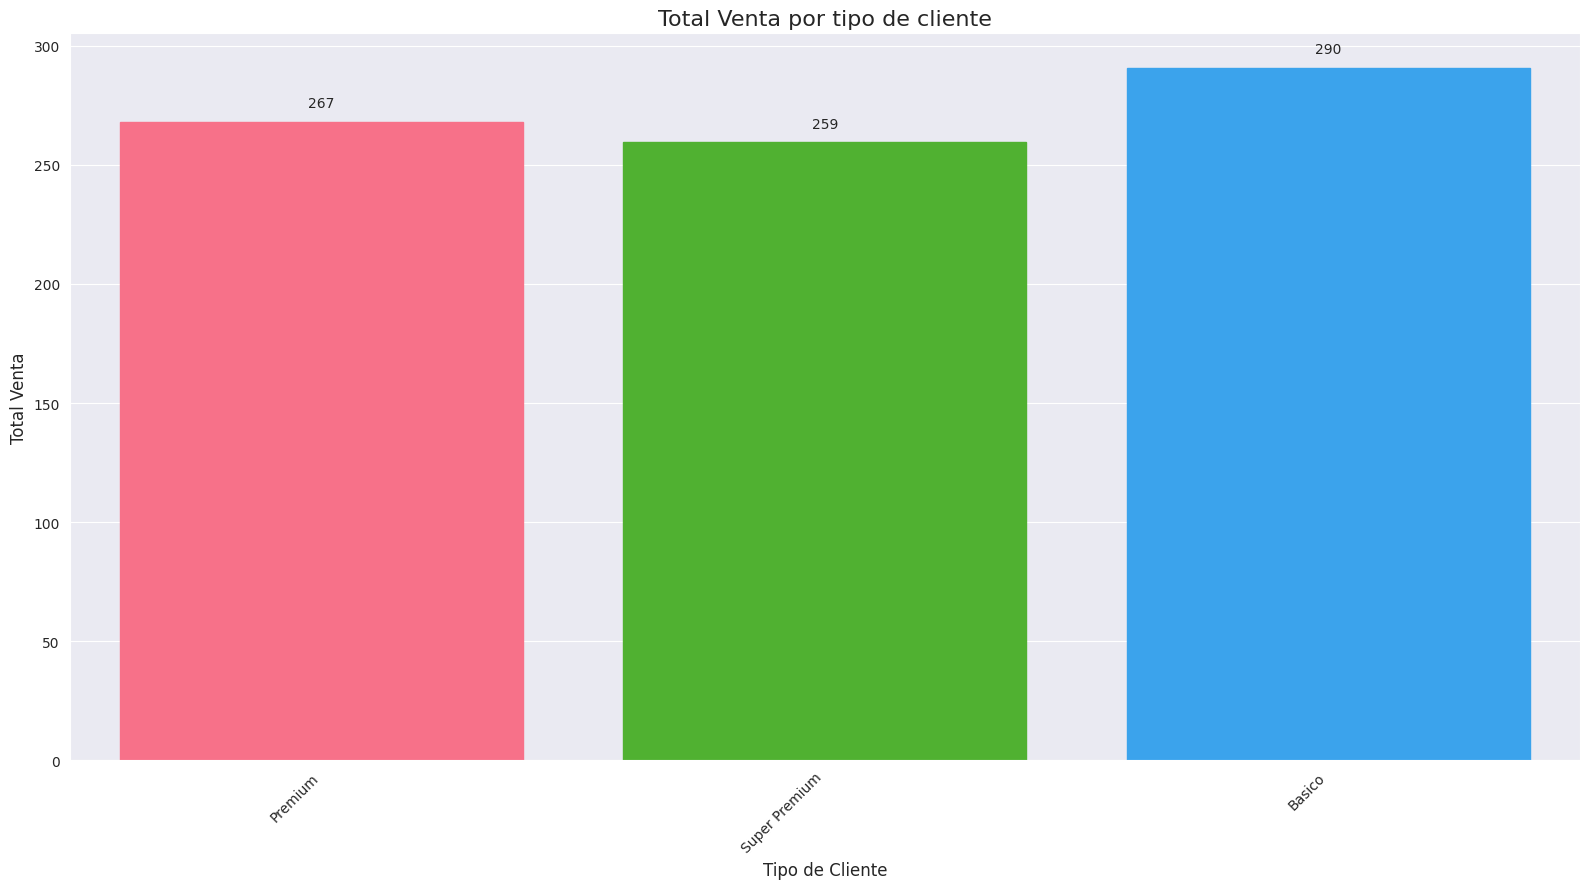

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 9))
sns.set_style("darkgrid")
ax = sns.barplot(x="tipo_cliente", y="total_venta", data=df_fusionado, ci=None)
colors = sns.color_palette("husl", len(ax.patches))
for patch, color in zip(ax.patches, colors):
    patch.set_color(color)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}',
            ha='center', va='bottom', fontsize=10)
plt.title('Total Venta por tipo de cliente', fontsize=16)
plt.xlabel('Tipo de Cliente', fontsize=12)
plt.ylabel('Total Venta', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Análisis univariado**

In [ ]:
df_base = pd.read_csv('Ventas_fusionado.csv', encoding='latin-1', sep=';')
media = df_base['total_venta'].mean()
mediana = df_base['total_venta'].median()
moda = df_base['total_venta'].mode()[0]
print(f"Media de total_venta: {media}")
print(f"Mediana de total_venta: {mediana}")
print(f"Moda de total_venta: {moda}")

Media de total_venta: 272.6736111111111
Mediana de total_venta: 42.0
Moda de total_venta: 2


In [ ]:
df_base = pd.read_csv('Ventas_fusionado.csv', encoding='latin-1', sep=';')
media = df_base['cantidad'].mean()
mediana = df_base['cantidad'].median()
moda = df_base['cantidad'].mode()[0]
print(f"Media de cantidad: {media}")
print(f"Mediana de cantidad: {mediana}")
print(f"Moda de cantidad: {moda}")

Media de cantidad: 3.7974537037037037
Mediana de cantidad: 3.0
Moda de cantidad: 3


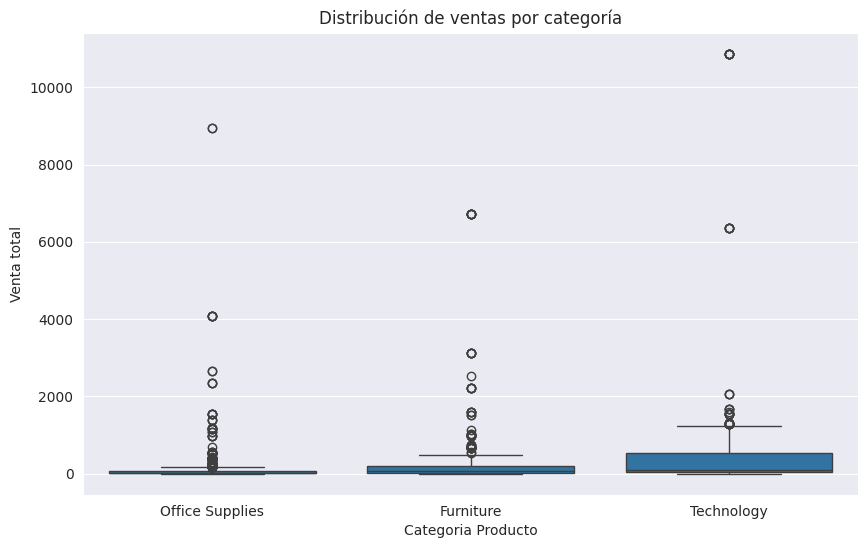

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.boxplot(x='categoria_producto', y='total_venta', data=df_base)
plt.title('Distribución de ventas por categoría')
plt.xlabel('Categoria Producto')
plt.ylabel('Venta total')
plt.show()

**Análisis bivariado**

In [ ]:
import pandas as pd
df_cliente = df_ventas.groupby('id_cliente')['cantidad'].sum().reset_index()
df_cliente_tipo = df_base[['id_cliente', 'tipo_cliente']].drop_duplicates()
df_merged = pd.merge(df_cliente, df_cliente_tipo, on='id_cliente', how='left')

In [ ]:
df_merged['tipo_cliente_num'] = df_merged['tipo_cliente'].astype('category').cat.codes
coeficiente = df_merged['tipo_cliente_num'].corr(df_merged['cantidad'], method='pearson')
print(f'Coeficiente de Pearson entre tipo_cliente y cantidad vendida: {coeficiente}')


Coeficiente de Pearson entre tipo_cliente y cantidad vendida: 0.009694080263321338


In [ ]:
import pandas as pd
df_agrupado = df_fusionado.groupby('categoria_producto')['total_venta'].sum().reset_index()
df_agrupado['categoria_num'] = df_agrupado['categoria_producto'].astype('category').cat.codes
coeficiente = df_agrupado['categoria_num'].corr(df_agrupado['total_venta'], method='pearson')
print(f'Coeficiente de Pearson entre categoría de producto y total de venta: {coeficiente}')

Coeficiente de Pearson entre categoría de producto y total de venta: 0.8859296167860901


In [ ]:
import pandas as pd
import plotly.express as px
df_agrupado = df_fusionado.groupby('categoria_producto')['total_venta'].sum().reset_index()
fig = px.scatter(
    df_agrupado,
    x='categoria_producto',
    y='total_venta',
    title='Dispersión entre Categoría de Producto y Total de Ventas',
    labels={'categoria_producto': 'Categoría de Producto', 'total_venta': 'Total de Ventas'}
)

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

**Análisis de regresión multivariada**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_fusionado[['cantidad', 'categoria_producto']]
X = pd.get_dummies(X, columns=['categoria_producto'], drop_first=True)
y = df_fusionado['total_venta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coeficientes = pd.Series(model.coef_, index=X.columns)
print("Coeficientes del modelo:\n", coeficientes)

Coeficientes del modelo:
 cantidad                              123.280410
categoria_producto_Office Supplies   -251.764248
categoria_producto_Technology         255.071432
dtype: float64
